In [2]:
# load tool

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree

%matplotlib inline

In [6]:
# import decision tree model
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
DT.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

In [7]:
# model evalutions
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import f1_score

In [8]:
df_1 = pd.read_csv("heart.csv")

In [10]:
df_1

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,40,1,3,152,223,0,0,181,0,0.0,0,0,2,1
293,39,1,3,118,219,0,0,140,0,1.2,1,0,2,1
294,35,1,3,120,198,0,0,130,1,1.6,1,0,2,1
295,35,0,3,138,183,0,0,182,0,1.4,0,0,0,0


In [9]:
# split data into X and y
X_1 = df_1.drop("condition",axis=1)
y_1= df_1["condition"]

* split into training and testing

In [10]:
np.random.seed(42)

#split into train and test
X1_train,X1_test,y1_train,y1_test=train_test_split(X_1,y_1,test_size=0.2)

In [11]:
DT.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

In [12]:
max_depth = range(1,31)
train_scores=[]
test_scores=[]
# loop through different n neighbours
for i in max_depth:
    DT.set_params(max_depth=i)
    DT.fit(X1_train,y1_train)
    # update the training scores list
    train_scores.append(DT.score(X1_train,y1_train))
    #update the test scores list
    test_scores.append(DT.score(X1_test,y1_test))
    

In [13]:
train_scores

[0.7805907172995781,
 0.7805907172995781,
 0.8818565400843882,
 0.9240506329113924,
 0.9493670886075949,
 0.9746835443037974,
 0.9915611814345991,
 0.9957805907172996,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

In [14]:
test_scores

[0.7,
 0.6833333333333333,
 0.7166666666666667,
 0.6333333333333333,
 0.65,
 0.7166666666666667,
 0.6833333333333333,
 0.7333333333333333,
 0.7333333333333333,
 0.6833333333333333,
 0.7166666666666667,
 0.7166666666666667,
 0.7333333333333333,
 0.75,
 0.7166666666666667,
 0.7,
 0.7,
 0.6666666666666666,
 0.7333333333333333,
 0.7166666666666667,
 0.7166666666666667,
 0.7166666666666667,
 0.7333333333333333,
 0.7333333333333333,
 0.7166666666666667,
 0.75,
 0.6666666666666666,
 0.7333333333333333,
 0.75,
 0.7166666666666667]

Max Decision Tree score on the test data: 75.00%


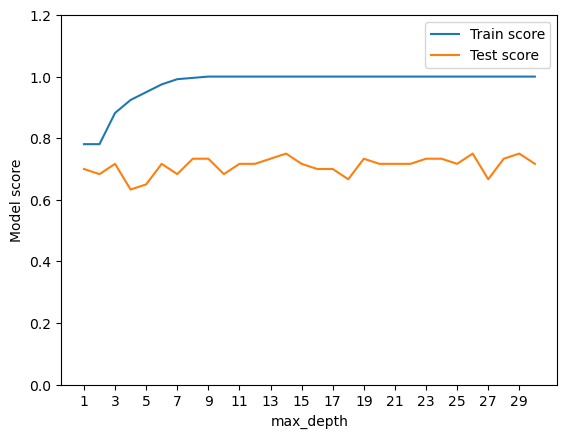

In [18]:
plt.plot(max_depth, train_scores, label="Train score")
plt.plot(max_depth, test_scores, label="Test score")
plt.ylim(0,1.2)
plt.xticks(np.arange(1,31,2))
plt.xlabel("max_depth")
plt.ylabel("Model score")
plt.legend()

print(f"Max Decision Tree score on the test data: {max(test_scores)*100:.2f}%")

In [57]:

f1_train_scores_gini=[]
f1_test_scores_gini=[]
# loop through different n neighbours
for i in max_depth:
    DT.set_params(max_depth=i, criterion = 'gini' )
    DT.fit(X1_train,y1_train)
    y1_train_pred = DT.predict(X1_train)
    y1_test_pred = DT.predict(X1_test)
    # update the training scores list
    f1_train_scores_gini.append(f1_score(y1_train,y1_train_pred))
    f1_test_scores_gini.append(f1_score(y1_test,y1_test_pred))
    
    

In [58]:
f1_train_scores_entropy=[]
f1_test_scores_entropy=[]
# loop through different n neighbours
for i in max_depth:
    DT.set_params(max_depth=i, criterion = 'entropy' )
    DT.fit(X1_train,y1_train)
    y1_train_pred = DT.predict(X1_train)
    y1_test_pred = DT.predict(X1_test)
    # update the training scores list
    f1_train_scores_entropy.append(f1_score(y1_train,y1_train_pred))
    f1_test_scores_entropy.append(f1_score(y1_test,y1_test_pred))

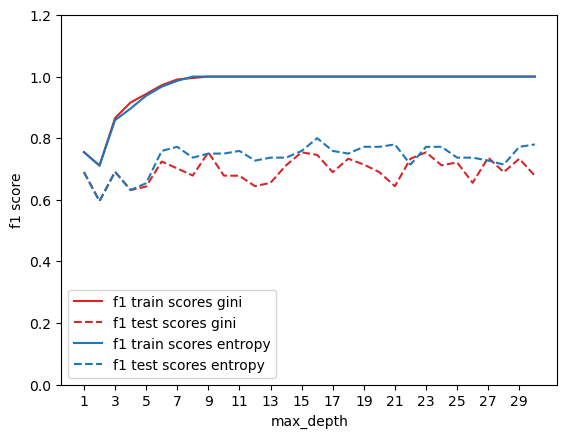

In [62]:
plt.plot(max_depth, f1_train_scores_gini, label="f1 train scores gini",color='C3',)
plt.plot(max_depth, f1_test_scores_gini, label="f1 test scores gini",color='C3', linestyle='--',)
plt.plot(max_depth, f1_train_scores_entropy, label="f1 train scores entropy",color='C0',)
plt.plot(max_depth, f1_test_scores_entropy, label="f1 test scores entropy",color='C0', linestyle='--',)
plt.xticks(np.arange(1,31,2))
plt.ylim(0,1.2)
plt.xlabel("max_depth")
plt.ylabel("f1 score")
plt.legend()



In [30]:
params_grid = {
    'criterion': ['gini','entropy'],
    'max_depth': range(1,21),
    'min_samples_split':range(2,5),
}

In [31]:
grid_search = GridSearchCV(
    estimator=DT,
    param_grid=params_grid,
    return_train_score=True,
    cv=4,
    verbose=5,
)

In [32]:
grid_search.fit(X1_train,y1_train)

Fitting 4 folds for each of 120 candidates, totalling 480 fits
[CV 1/4] END criterion=gini, max_depth=1, min_samples_split=2;, score=(train=0.774, test=0.800) total time=   0.0s
[CV 2/4] END criterion=gini, max_depth=1, min_samples_split=2;, score=(train=0.775, test=0.797) total time=   0.0s
[CV 3/4] END criterion=gini, max_depth=1, min_samples_split=2;, score=(train=0.758, test=0.847) total time=   0.0s
[CV 4/4] END criterion=gini, max_depth=1, min_samples_split=2;, score=(train=0.815, test=0.678) total time=   0.0s
[CV 1/4] END criterion=gini, max_depth=1, min_samples_split=3;, score=(train=0.774, test=0.800) total time=   0.0s
[CV 2/4] END criterion=gini, max_depth=1, min_samples_split=3;, score=(train=0.775, test=0.797) total time=   0.0s
[CV 3/4] END criterion=gini, max_depth=1, min_samples_split=3;, score=(train=0.758, test=0.847) total time=   0.0s
[CV 4/4] END criterion=gini, max_depth=1, min_samples_split=3;, score=(train=0.815, test=0.678) total time=   0.0s
[CV 1/4] END crit

GridSearchCV(cv=4, estimator=DecisionTreeClassifier(max_depth=30),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 21),
                         'min_samples_split': range(2, 5)},
             return_train_score=True, verbose=5)

In [34]:
res = grid_search.cv_results_


In [35]:
res

{'mean_fit_time': array([0.00175327, 0.00173414, 0.00124061, 0.00123334, 0.00100291,
        0.00122076, 0.00154614, 0.00123751, 0.00097919, 0.00125921,
        0.00175655, 0.00125009, 0.00150013, 0.00149965, 0.00174958,
        0.0019747 , 0.00151742, 0.00122368, 0.00149739, 0.00122112,
        0.00125521, 0.00125921, 0.00174397, 0.00124866, 0.00151193,
        0.00150532, 0.00139493, 0.0012567 , 0.0015229 , 0.00152105,
        0.00151318, 0.00146425, 0.00124961, 0.00138724, 0.00126827,
        0.00128263, 0.0017491 , 0.00174683, 0.00123596, 0.0012629 ,
        0.00115252, 0.00127566, 0.00151294, 0.00124377, 0.00176287,
        0.00152677, 0.0015074 , 0.00152183, 0.00125551, 0.00126296,
        0.00145298, 0.00127035, 0.00154638, 0.00131905, 0.00125927,
        0.00151968, 0.00146514, 0.00148809, 0.00176805, 0.00125062,
        0.00173748, 0.00101846, 0.00113863, 0.00122476, 0.00118774,
        0.0011996 , 0.00096703, 0.00152248, 0.00154018, 0.00125623,
        0.00098497, 0.00124866,

In [38]:
grid_search.best_params_

{'criterion': 'entropy', 'max_depth': 3, 'min_samples_split': 2}

In [39]:
grid_search.score(X1_test,y1_test)

0.7166666666666667

In [67]:
grid_search.score(X1_train,y1_train)
model=grid_search.best_estimator_

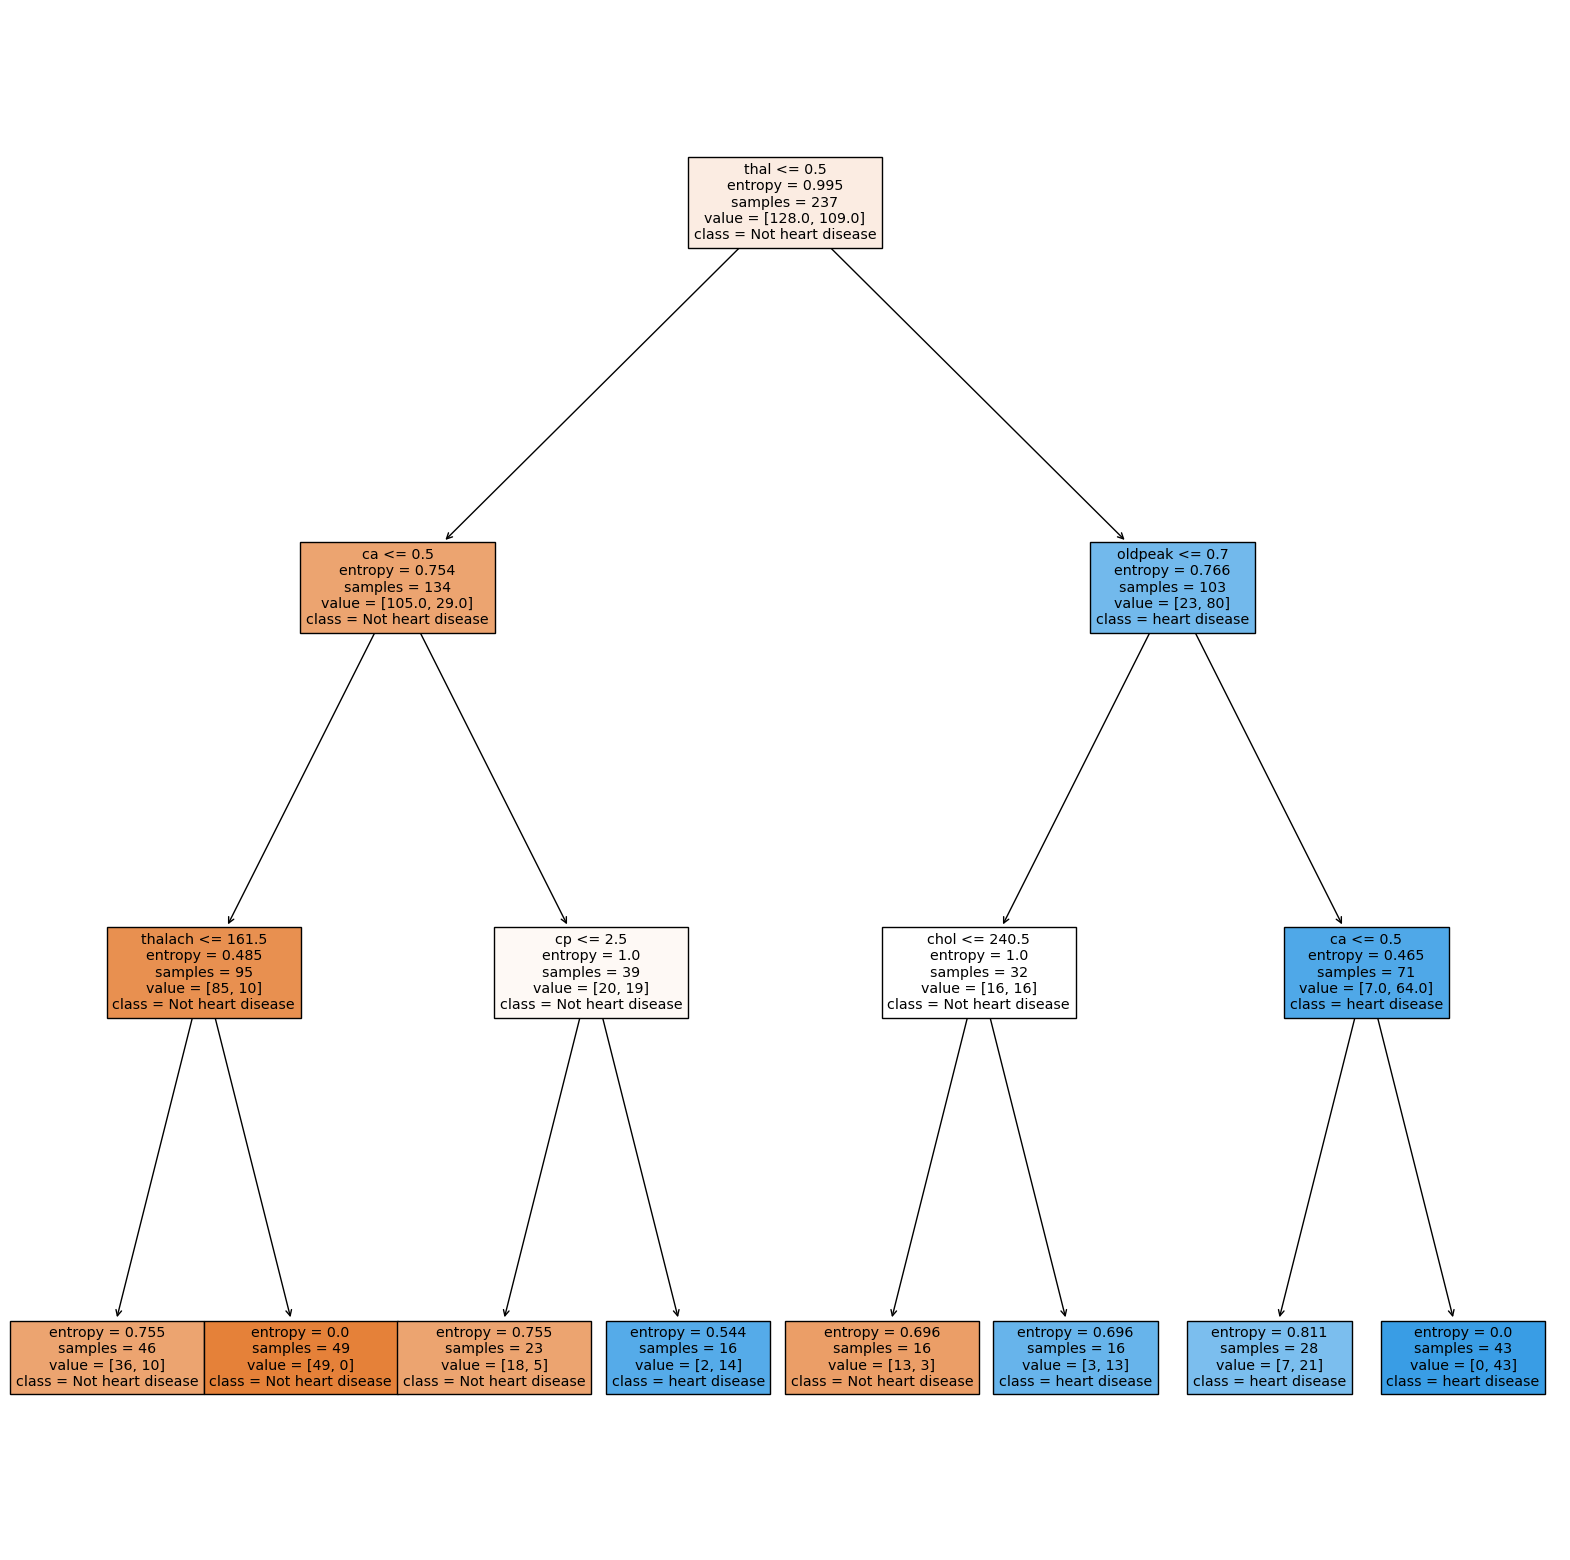

In [68]:
plt.figure(figsize=(20,20))
features = df_1.columns
classes = ['Not heart disease','heart disease']
tree.plot_tree(model,feature_names=features,class_names=classes,filled=True)
plt.show()

In [44]:
from sklearn.model_selection import learning_curve, validation_curve

In [45]:
DT_best = DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split = 2)

In [46]:
train_sizes, train_scores, test_scores, fit_times, score_times = learning_curve(
        estimator=DT_best,
        X=X1_train,
        y=y1_train,
        train_sizes=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,1 ],
        return_times = True 
)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
fit_time_mean = np.mean(fit_times, axis=1)
fit_time_std = np.std(fit_times, axis=1)
score_time_mean = np.mean(score_times, axis=1)
score_time_std = np.std(score_times, axis=1)

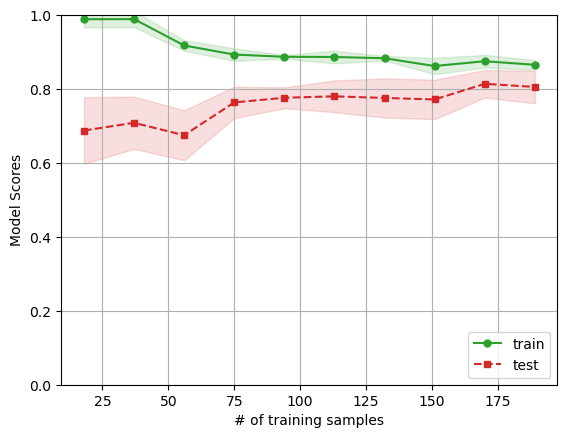

In [52]:
plt.plot(train_sizes, train_mean,
             color='C2', marker='o',
             markersize=5, label='train')

plt.fill_between(train_sizes,
                     train_mean + train_std,
                     train_mean - train_std,
                     alpha=0.15, color='C2')

plt.plot(train_sizes, test_mean,
             color='C3', linestyle='--',
             marker='s', markersize=5,
             label='test')

plt.fill_between(train_sizes,
                     test_mean + test_std,
                     test_mean - test_std,
                     alpha=0.15, color='C3')
plt.grid()
plt.ylim(0,1)
plt.xlabel('# of training samples')
plt.ylabel('Model Scores')
plt.legend(loc='lower right')
plt.show()

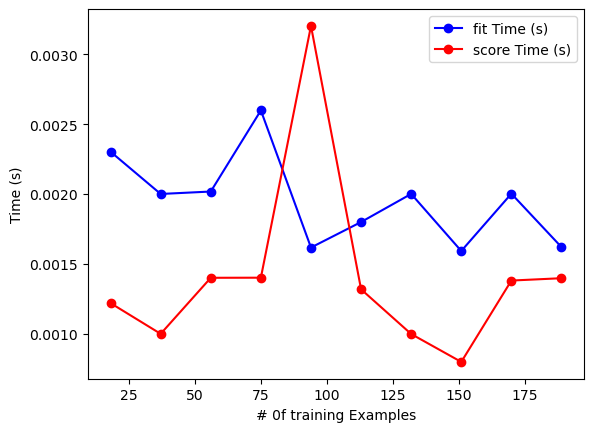

In [53]:
plt.figure()
# plt.title("Modeling Time: "+ title)
plt.xlabel("# 0f training Examples")
plt.ylabel("Time (s)")
# plt.fill_between(train_sizes, fit_time_mean - 2*fit_time_std, fit_time_mean + 2*fit_time_std, alpha=0.1, color="b")
# plt.fill_between(train_sizes, score_time_mean - 2*score_time_std, score_time_mean + 2*score_time_std, alpha=0.1, color="r")
plt.plot(train_sizes, fit_time_mean, 'o-', color="b", label="fit Time (s)")
plt.plot(train_sizes, score_time_mean, 'o-', color="r", label="score Time (s)")
plt.legend(loc="best")
plt.show()